#**Pra-pemrosesan Data untuk Model**
Neural Network (NN) dapat digunakan untuk klasifikasi gambar, deteksi objek, pengenalan suara, dan prediksi time series.
Dataset untuk setiap masalah tentunya berbeda. Contohnya pada dataset untuk klasifikasi gambar dan dataset untuk pemrosesan bahasa alami atau NLP. Pada dataset untuk klasifikasi gambar, sampelnya berupa kumpulan gambar atau matriks hasil representasi sebuah gambar.

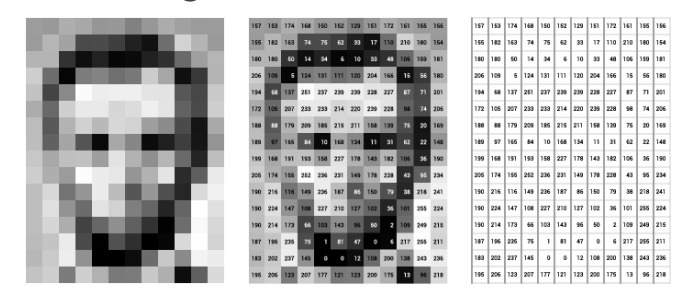

Sedangkan pada dataset NLP, sampelnya tentu berupa kalimat-kalimat yang terdiri dari sejumlah kata tertentu seperti gambar di bawah.

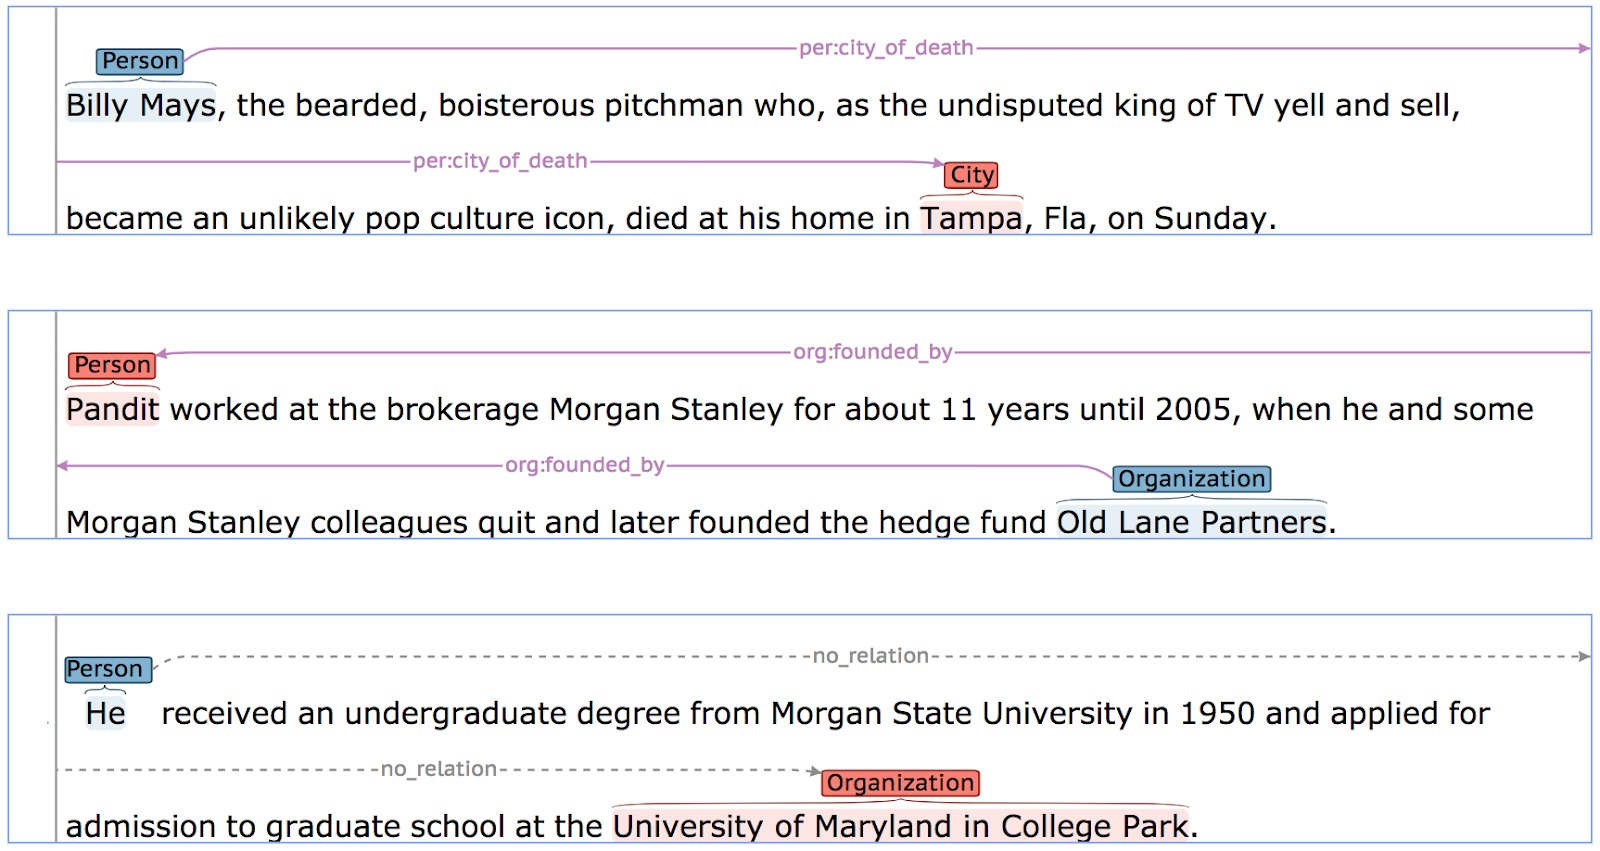

Tidak seperti manusia yang bisa mengenali gambar atau memahami kalimat secara langsung, kita perlu melakukan pemrosesan dahulu agar data tersebut siap diterima oleh model.

Secara umum, ada 4 tahapan yang perlu kita lakukan dalam memproses data yaitu:

1. Ubah dataset ke dalam bentuk larik. Yup, larik berisi angka-angka adalah format data yang dapat diterima oleh model kita. Masih ingat bukan, seperti pada kelas belajar machine learning untuk pemula, model kita menerima gambar sebagai matriks atau larik 2 dimensi.
2. Pisahkan atribut dan label pada data. Model kita akan mempelajari korelasi antara atribut dan label pada dataset kita.
3. Ubah skala data dalam skala yang seragam. Tahap ini sudah kita pelajari sebelumnya. Masih ingat? Nama teknik ini adalah normalization. Normalization dilakukan karena NN bekerja dengan baik memproses nilai yang berada di antara 0 dan 1.
4. Terakhir, pisahkan dataset ke dalam data latih dan data uji.


#**Menggunakan Model untuk Melakukan Prediksi**
Sama seperti model ML yang disediakan pada library Scikit Learn, mekanisme kerja dari model dari library tensorflow dan keras API juga sama.

Sebuah model dari API keras dapat menerima masukan dengan tipe data numpy array. Sehingga kita bisa membuat 2 buah objek bertipe numpy array, satu untuk atribut dan satu sebagai labelnya. Untuk jenis tipe data lain yang dapat diterima sebagai masukan sebuah model dari API keras, Anda dapat mengunjungi tautan berikut ya. https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

Kemudian kita buat model JST kita dengan memanggil fungsi tf.keras.Sequential(). Sequential adalah model JST yang paling sederhana dan telah kita pelajari sebelumnya. Pada model sequential, setiap layer pada jaringan saraf tiruan terhubung secara sekuensial, sesuai namanya.

In [6]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Pada model sequential ini, kita kemudian isi layer yang kita inginkan untuk model kita. Untuk membuat sebuah layer, kita dapat menggunakan fungsi keras.layers.Dense().

1. Parameter units dari fungsi keras.layers.Dense() adalah jumlah perseptron yang dimiliki oleh layer tersebut. Yang perlu diperhatikan pada model sequential adalah, layer pertama dari model tersebut haruslah memiliki parameter input_shape agar model bisa mengenali bentuk input yang akan diprosesnya.
2. Parameter input_shape menunjukkan bentuk dari setiap elemen input yang akan diterima oleh model. Pada kasus kita setiap elemen dari data kita adalah sebuah bilangan numerik 1 digit, sehingga kita bisa isi input_shape kita dengan angka 1. Jika sebuah elemen dari dataset kita berupa gambar yang memiliki dimensi 32*32 piksel, maka input_shape yang sesuai adalah [32,32].

Kemudian, hal yang paling penting selanjutnya adalah menentukan optimizer dan loss dari model agar model kita bisa belajar. Untuk menentukan optimizer dan loss kita gunakan fungsi compile. Untuk masalah regresi kita yang sederhana, kita dapat menggunakan stochastic gradient descent sebagai optimizer, dan mean squared error sebagai loss function model kita.

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Kita panggil fungsi yang paling terkenal dari machine learning yaitu fit(). Fungsi fit() adalah fungsi di mana kita menyuruh model kita untuk mempelajari hubungan antara atribut dan label pada dataset. Selain atribut dan label, Parameter lain yang diperlukan sebuah model keras pada fit adalah epochs. Epochs adalah berapa kali sebuah JST harus belajar memperbaiki akurasinya.

In [8]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 486ms/step - loss: 98.6446
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 45.8660
Epoch 3/150
1/1 [==============================] - 0s 10ms/step - loss: 21.4369
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 10.1289
Epoch 5/150
1/1 [==============================] - 0s 9ms/step - loss: 4.8937
Epoch 6/150
1/1 [==============================] - 0s 9ms/step - loss: 2.4692
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 1.3455
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 0.8240
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 0.5812
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 0.4673
Epoch 11/150
1/1 [==============================] - 0s 8ms/step - loss: 0.4132
Epoch 12/150
1/1 [==============================] - 0s 8ms/step - loss: 0.3867
Epoch 13/150
1/1 [==============================] - 0

Eror yang dibuat model akan semakin menurun pada kasus regresi kita. Ketika model kita telah dilatih, kita kemudian dapat menggunakan model tersebut untuk memprediksi data yang belum pernah dilihatnya menggunakan fungsi predict. Ketika kita menjalankan kode di bawah, hasil yang kita dapat seharusnya adalah 22 dimana 2(10)+2=22.

In [9]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 187ms/step
[[23.10852]]


Menariknya, hasil yang didapat dari JST kita akan mendekati angka 22. Kenapa demikian? Karena JST menghitung probabilitas. Neural network tidak memprediksi kepastian melainkan probabilitas. Pada kasus kita neural network mempelajari bahwa pola yang terdapat pada dataset kemungkinan adalah 2X+2, namun ia juga belum pasti tentang hal itu. Sehingga prediksi yang dihasilkan adalah probabilitas hasilnya mendekati 22. Semakin banyak data yang kita berikan dan juga eror ketika training model semakin kecil, maka prediksi dari NN akan semakin mendekati 22.

#**Model Sekuensial dengan Beberapa Layer**

Kita akan selalu menggunakan banyak layer untuk masalah yang kita hadapi pada industri. Bayangkan jika kita ingin mengembangkan model untuk mengklasifikasi tumor otak yang memiliki dataset 500.000 gambar scan dari otak pasien. Jika model yang kita buat hanya memiliki 1 layer, alih-alih akurasi mendekati 99%, justru eror yang akan sangat mendekati 99%. Di sinilah kita harus paham cara menggunakan multiple layer ketika mengembangkan jst.

Untungnya, sangatlah mudah untuk menambahkan layer pada model kita. Kita cukup menambahkan fungsi Dense sesuai jumlah layer yang kita inginkan dari model kita.

Pada kode di bawah kita memanggil fungsi dense sebanyak 3 kali yang menunjukkan bahwa model kita memiliki 3 buah layer. Layer pertama hanya memiliki 1 buah perseptron, layer kedua memiliki 8 buah perseptron, dan layer terakhir memiliki 1 buah perseptron. Ingat kembali ya, bahwa layer pertama dari model sequential harus memiliki parameter input_shape agar model bisa mengenali bentuk input yang akan diterimanya.

In [10]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])

#**Membuat Model untuk Klasifikasi Dua Kelas**

In [11]:
import zipfile,os,shutil

In [12]:
# load dataset
!wget --no-check-certificate \
 https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

--2024-01-12 09:17:07--  https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘oranges-vs-grapefruit’

oranges-vs-grapefru     [ <=>                ]   9.46K  --.-KB/s    in 0.03s   

2024-01-12 09:17:08 (285 KB/s) - ‘oranges-vs-grapefruit’ saved [9684]



In [13]:
from google.colab import files

uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [15]:
import zipfile
import io

# Ganti 'nama_file.zip' dengan nama file zip yang diunggah
with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/hp/Downloads')

In [16]:
import os

os.listdir('C:/Users/hp/Downloads')

['citrus.csv']

In [17]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file CSV dalam dataset Anda
dataset = pd.read_csv('C:/Users/hp/Downloads/citrus.csv')

# Tampilkan beberapa baris pertama dari dataset
print(dataset.head())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Jst tidak bisa memproses string? Karena itulah kita harus mengubah nilai-nilai pada kolom label menjadi numerik terlebih dahulu agar bisa diproses oleh jst.

Jalankan kode di bawah untuk mengubah nilai-nilai pada kolom name menjadi bilangan numerik. Untuk nilai yang berisi string ‘orange’ akan diubah menjadi 0 dan nilai yang berisi string ‘grapefruit’ akan diubah menjadi 1.

In [19]:
dataset['name'].unique

<bound method Series.unique of 0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, Length: 10000, dtype: object>

In [20]:
dataset.name[dataset.name == 'orange'] = 0
dataset.name[dataset.name == 'grapefruit'] = 1

<ipython-input-20-eb443ed112d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.name[dataset.name == 'orange'] = 0
<ipython-input-20-eb443ed112d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.name[dataset.name == 'grapefruit'] = 1


In [21]:
dataset = dataset.values

In [22]:
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

Kemudian kita perlu memisahkan antara atribut dan label pada dataset. Dari eksplorasi data kita sebelumnya, dapat diketahui bahwa 5 kolom terakhir adalah kolom atribut. Untuk memilih 5 kolom terakhir jalankan kode di bawah.

In [23]:
# pilih 5 kolom terakhir sebagai atribut
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

Jangan lupa untuk memisahkan label dari dataset. Pada dataset kita, label terdapat pada kolom pertama. Jalankan kode di bawah untuk membuat sebuah array numpy yang hanya berisi label kita.

In [24]:
y = dataset[:,0]

Selanjutnya ada tahap yang sangat penting dilakukan agar jst bisa mempelajari dataset dengan baik, apalagi kalau bukan normalisasi. Kita bisa menggunakan fungsi fit_transform() dari sebuah objek MinMaxScaler dari library preprocessing SKLearn untuk menormalisasi data kita.

In [25]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

Setelah kita memiliki atribut dan label yang terpisah, kita juga akan memisahkan kembali data kita menjadi data latih dan data uji untuk mengevaluasi kinerja model kita. Fungsi train_test_split dapat membantu kita untuk melakukan hal ini dengan mudah. Pada latihan ini kita akan menggunakan 30% dari seluruh data sebagai data uji.


In [26]:
# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Dataset telah dipisahkan ke dalam training dan test set. Karena tadi kita mengubah nilai-nilai pada kolom name menjadi bilangan numerik, yang artinya kita mengubah label menjadi tipe data boolean, maka kita perlu mengubah tipe data tersebut menjadi float32 dengan cara berikut.

In [27]:
import numpy as np

Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

#**Lanjut membangun model jst**

In [28]:
from keras.models import Sequential
from keras.layers import Dense

Untuk model yang kita kembangkan adalah model sequential yang memiliki 3 buah layer seperti di bawah. Activation function pada 2 layer pertama yang dapat digunakan adalah relu untuk latihan ini. Anda dapat bereksplorasi menggunakan activation function lain. Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari jst kita merupakan satu buah bilangan numerik. Activation function pada layer terakhir dipilih sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1. Sigmoid sangat cocok digunakan pada masalah klasifikasi biner.



In [29]:
model = Sequential([
                    Dense(32, activation='relu', input_shape=(5,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),])

Kemudian setelah arsitektur dari jst dibentuk, kita perlu menentukan optimizer dan loss function dari model kita. Untuk optimizer kita akan menggunakan stochastic gradient descent (sgd) yang merupakan optimizer yang sangat umum dan cocok dipakai pada dataset yang berukuran kecil. Dan untuk loss yang sesuai adalah ‘binary_crossentropy’ karena masalah pada latihan kita kali ini adalah masalah 2 kelas (biner).

Selain itu jika kita ingin menampilkan akurasi pada setiap proses pelatihan model kita dapat menambahkan parameter metrics dan mengisinya dengan string ‘accuracy’.

In [30]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6825 - accuracy: 0.6949
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.8863
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.9057
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.9129
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.9176
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.9211
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.9217
Epoch 8/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.9221
Epoch 9/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2455 - accuracy: 0.9230
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2225 - accura

Terakhir, jangan lupa untuk mengevaluasi model Anda dan melihat apakah model Anda underfit atau overfit. Untuk melihat loss dan akurasi model pada data test, gunakan fungsi evaluate pada model. Fungsi Evaluate mengembalikan 2 nilai. Yang pertama adalah nilai loss, dan yang kedua adalah nilai akurasinya.

In [33]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 1s 4ms/step - loss: 0.1714 - accuracy: 0.9333


[0.17139099538326263, 0.9333333373069763]